# Airline Delay Predictions

## Airlines Dataset to predict a delay
### Category Definitions:
**id** - Unique row identifier ID.

**Airline** - Abreviated name of different commericial airlines.

**Flight** - Tell about the type of aircraft used.

**AirportFrom** - The airport origin for the flight.

**AirportTo** - The airport destination for the flight.

**DayOfWeek** - Day of the week when the flight took place.

**Time** - Time of flight.

**Length** - Length of flight.

**Delay** - Whether or not there was a delay.

For this analysis, we will be using several different types of supervised machine learning methods in an attempt to make the most accurate prediction for whether there is a flight delay. This is a classification problem where the dependant varaible (Delay) has two states, 0 or 1, where 0 means there was no delay and 1 means there was a delay. This data provides only generic and static flight info. Information that can vary up until flight time, like weather, are not included in this data becauase that kind of information is generally unkown until flight time.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from pathlib import Path
from fastai.tabular.all import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from dtreeviz.trees import *
import graphviz

In [2]:
# file_path = Path('/Users/petergunn/Project_4-/Resources /Airlines.csv')
file_path = Path('Resources/Airlines.csv')
df = pd.read_csv(file_path)
df.head()


,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [3]:
# total number of rows and columns in the dataset
df.shape

(539383, 9)

In [4]:
df.duplicated().sum()

0

In [5]:
sandbox_df = df.loc[(df.AirportFrom == "ATL")]
sandbox_df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
80,81,US,1732,ATL,CLT,3,330,68,1
359,360,MQ,3853,ATL,ORD,3,360,115,0
521,522,YV,7218,ATL,IAD,3,360,100,0
645,646,F9,653,ATL,DEN,3,370,201,1
738,739,EV,4993,ATL,DTW,3,375,110,1
...,...,...,...,...,...,...,...,...,...
539295,539296,DL,1277,ATL,CHS,5,1365,67,0
539298,539299,DL,2950,ATL,RDU,5,1365,79,1
539299,539300,DL,2969,ATL,MCO,5,1365,86,1
539301,539302,EV,5091,ATL,JAN,5,1365,81,0


In [6]:
sandbox_df = sandbox_df.sample(n=700, random_state=1)
sandbox_df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
47639,47640,DL,2011,ATL,DFW,5,957,148,0
160584,160585,MQ,3769,ATL,ORD,5,570,125,0
431572,431573,DL,1935,ATL,MSY,6,1310,106,1
67380,67381,EV,5026,ATL,ABE,6,1215,112,1
233057,233058,MQ,3709,ATL,ORD,2,845,125,0
...,...,...,...,...,...,...,...,...,...
454568,454569,DL,1625,ATL,GPT,1,560,93,1
108403,108404,DL,1230,ATL,MSP,2,615,176,0
420460,420461,FL,133,ATL,TPA,6,540,85,0
6126,6127,EV,5424,ATL,CAK,3,660,107,1


In [7]:
sandbox_df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
47639,47640,DL,2011,ATL,DFW,5,957,148,0
160584,160585,MQ,3769,ATL,ORD,5,570,125,0
431572,431573,DL,1935,ATL,MSY,6,1310,106,1
67380,67381,EV,5026,ATL,ABE,6,1215,112,1
233057,233058,MQ,3709,ATL,ORD,2,845,125,0
...,...,...,...,...,...,...,...,...,...
454568,454569,DL,1625,ATL,GPT,1,560,93,1
108403,108404,DL,1230,ATL,MSP,2,615,176,0
420460,420461,FL,133,ATL,TPA,6,540,85,0
6126,6127,EV,5424,ATL,CAK,3,660,107,1


In [8]:
dummies_df = pd.get_dummies(sandbox_df, columns= ['Airline'], drop_first= False)
dummies_df

,id,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Airline_9E,Airline_AA,...,Airline_EV,Airline_F9,Airline_FL,Airline_MQ,Airline_OH,Airline_OO,Airline_UA,Airline_US,Airline_XE,Airline_YV
47639,47640,2011,ATL,DFW,5,957,148,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160584,160585,3769,ATL,ORD,5,570,125,0,0,0,...,0,0,0,1,0,0,0,0,0,0
431572,431573,1935,ATL,MSY,6,1310,106,1,0,0,...,0,0,0,0,0,0,0,0,0,0
67380,67381,5026,ATL,ABE,6,1215,112,1,0,0,...,1,0,0,0,0,0,0,0,0,0
233057,233058,3709,ATL,ORD,2,845,125,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454568,454569,1625,ATL,GPT,1,560,93,1,0,0,...,0,0,0,0,0,0,0,0,0,0
108403,108404,1230,ATL,MSP,2,615,176,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420460,420461,133,ATL,TPA,6,540,85,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6126,6127,5424,ATL,CAK,3,660,107,1,0,0,...,1,0,0,0,0,0,0,0,0,0


array([[<AxesSubplot:title={'center':'Length'}>],
       [<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

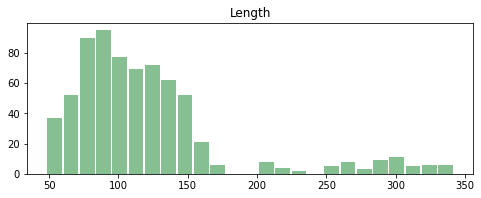

In [9]:
sandbox_df.hist(column='Length', bins=25, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)


In [10]:
sandbox_df.Delay.unique()

sandbox_df.isnull().values.any()

False

In [11]:
dummies_df.Delay.unique()

dummies_df.isnull().values.any()

False

In [12]:
dummies_df

,id,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Airline_9E,Airline_AA,...,Airline_EV,Airline_F9,Airline_FL,Airline_MQ,Airline_OH,Airline_OO,Airline_UA,Airline_US,Airline_XE,Airline_YV
47639,47640,2011,ATL,DFW,5,957,148,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160584,160585,3769,ATL,ORD,5,570,125,0,0,0,...,0,0,0,1,0,0,0,0,0,0
431572,431573,1935,ATL,MSY,6,1310,106,1,0,0,...,0,0,0,0,0,0,0,0,0,0
67380,67381,5026,ATL,ABE,6,1215,112,1,0,0,...,1,0,0,0,0,0,0,0,0,0
233057,233058,3709,ATL,ORD,2,845,125,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454568,454569,1625,ATL,GPT,1,560,93,1,0,0,...,0,0,0,0,0,0,0,0,0,0
108403,108404,1230,ATL,MSP,2,615,176,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420460,420461,133,ATL,TPA,6,540,85,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6126,6127,5424,ATL,CAK,3,660,107,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [13]:
y = dummies_df['Delay'].values
X = dummies_df.drop('Delay', axis =1)
X = X.drop('AirportFrom', axis =1)
X = X.drop('AirportTo', axis= 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
np.unique(y)

array([0, 1], dtype=int64)

In [15]:
logistic_regression = LogisticRegression().fit(X_train, y_train)

In [16]:
print('LogisticRegression Training score: ', logistic_regression.score(X_train,y_train))
print('LogisticRegression Test score: ', logistic_regression.score(X_test, y_test))

LogisticRegression Training score:  0.5638095238095238
LogisticRegression Test score:  0.5314285714285715


In [17]:
RandomForest_classifier = RandomForestClassifier(random_state=1)
RandomForest_classifier.fit(X_train, y_train)
print('RandomForestClassifier Training score: ', RandomForest_classifier.score(X_train,y_train))
print('RandomForestClassifier Test score: ', RandomForest_classifier.score(X_test,y_test))

RandomForestClassifier Training score:  1.0
RandomForestClassifier Test score:  0.6457142857142857


In [18]:
delay_frac = round((df["Delay"] == 1).mean(), 3)
print(f"Overall fraction of delays: {delay_frac}")

Overall fraction of delays: 0.445


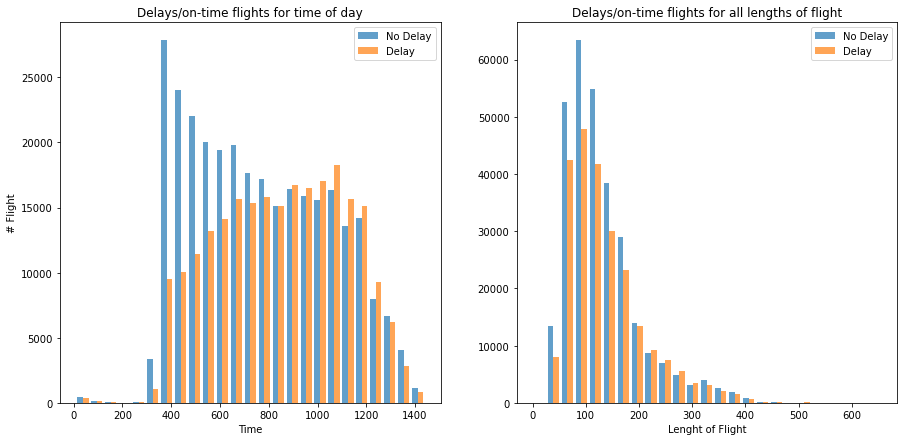

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist([df["Time"][df["Delay"] == 0], df["Time"][df["Delay"] == 1]], 25, alpha = .7, histtype='bar',label=["No Delay","Delay"])
ax1.set(xlabel="Time", ylabel="# Flight")
ax1.set_title("Delays/on-time flights for time of day")
ax1.legend()

ax2.hist([df["Length"][df["Delay"] == 0], df["Length"][df["Delay"] == 1]], 25, alpha = .7, histtype='bar', label=["No Delay","Delay"])
ax2.set(xlabel="Lenght of Flight")
ax2.set_title("Delays/on-time flights for all lengths of flight")
ax2.legend()

fig.set_size_inches(15, 7)

In [20]:
# Categorical and continuous data types taken care of, as well as filling any missing data

cat, cont = ["Airline", "Flight", "AirportTo", "DayOfWeek", "AirportFrom"], ["Time", "Length"]

splits = RandomSplitter(seed=442, valid_pct=0.1)(df)

to = TabularPandas(
    df, splits=splits,
    procs = [Categorify, FillMissing, Normalize],
    cat_names=cat,
    cont_names=cont,
    y_names="Delay", y_block = CategoryBlock(),
).dataloaders(bs=2048, path=".")
to.show(3)

,Airline,Flight,AirportTo,DayOfWeek,AirportFrom,Time,Length,Delay
143966,FL,92,ATL,4,RDU,645.0,86.0,0
133386,US,868,PHL,3,JAX,1030.0,129.0,1
320585,DL,2175,DFW,7,MSP,855.0,150.0,0


### Model 1
Model 1 will be a fully connected nueral network containing three hidden layers with 400, 200, and 10 neurons respectively.

In [21]:
learn = tabular_learner(to, metrics=accuracy, layers=[400,200,10])
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [22]:
learn = tabular_learner(to, metrics=accuracy, layers=[400,200,10])
learn.fit_one_cycle(5, cbs= SaveModelCallback())

epoch,train_loss,valid_loss,accuracy,time
0,0.623506,0.613611,0.658571,00:17
1,0.604684,0.607869,0.666728,00:17
2,0.593219,0.607086,0.668082,00:17
3,0.575904,0.610320,0.667544,00:17
4,0.554507,0.618631,0.664207,00:16


Better model found at epoch 0 with valid_loss value: 0.6136114001274109.
Better model found at epoch 1 with valid_loss value: 0.6078692674636841.
Better model found at epoch 2 with valid_loss value: 0.6070864796638489.


### Model 2
This model will be another triple hidden layer model with 100, 50, and 50 nuerons in each hidden layer respectively.

In [23]:
learn2 = tabular_learner(to, metrics=accuracy, layers=[100,50,50])
print(learn2.loss_func)
learn2.fit_one_cycle(5, cbs= SaveModelCallback())

FlattenedLoss of CrossEntropyLoss()


epoch,train_loss,valid_loss,accuracy,time
0,0.620293,0.614460,0.658831,00:10
1,0.604715,0.608155,0.667915,00:11
2,0.593510,0.607587,0.668379,00:11
3,0.576819,0.609833,0.668063,00:10
4,0.555443,0.617225,0.663484,00:11


Better model found at epoch 0 with valid_loss value: 0.6144596338272095.
Better model found at epoch 1 with valid_loss value: 0.6081551313400269.
Better model found at epoch 2 with valid_loss value: 0.607587456703186.


### Model 3
In this final model, I will try a simple double hidden layer model with 60 and 30 neurons respectively.

In [24]:
learn3 = tabular_learner(to, metrics=accuracy, layers=[60,30])
print(learn3.loss_func)
learn3.fit_one_cycle(5, cbs= SaveModelCallback())

FlattenedLoss of CrossEntropyLoss()


epoch,train_loss,valid_loss,accuracy,time
0,0.619113,0.613230,0.663892,00:10
1,0.603900,0.607577,0.666302,00:10
2,0.592095,0.607567,0.667452,00:10
3,0.578224,0.609735,0.666209,00:10
4,0.560708,0.614430,0.664874,00:10


Better model found at epoch 0 with valid_loss value: 0.6132299900054932.
Better model found at epoch 1 with valid_loss value: 0.6075766682624817.
Better model found at epoch 2 with valid_loss value: 0.6075667142868042.


In [25]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y
len(xs), len(valid_xs)

(485445, 53938)

In [26]:
def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

m = DecisionTreeClassifier(max_leaf_nodes=4)
m.fit(xs, y);

In [27]:
def accuracy(pred, y):
    return (pred == y).mean()
accuracy(m.predict(valid_xs), valid_y)

0.6225295709889132

In [28]:
# draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

In [29]:
# Tree with more splits than we had prior
m = DecisionTreeClassifier(min_samples_leaf=25)
print(m.fit(to.train.xs, to.train.y))

DecisionTreeClassifier(min_samples_leaf=25)


In [30]:
accuracy(m.predict(valid_xs), valid_y)

0.6509325521895509

## Random Forest

In [31]:
def rf(xs, y, n_estimators=45, max_samples=int(2/3*len(xs)),
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)
m = rf(xs, y);

In [32]:
accuracy(m.predict(valid_xs), valid_y)

0.6627424079498684

Text(0.5, 1.0, 'Random Forest loss convergence')

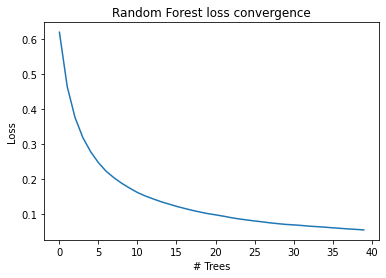

In [33]:
preds = np.stack([t.predict(valid_xs.values) for t in m.estimators_]);
plt.plot([accuracy(preds[:i+1].mean(0), valid_y) for i in range(40)]);
plt.ylabel("Loss")
plt.xlabel("# Trees")
plt.title("Random Forest loss convergence")

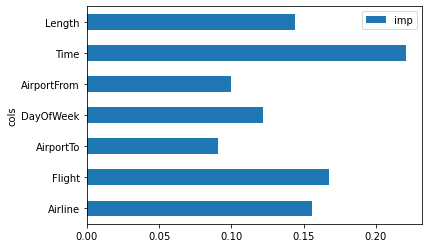

In [34]:
pd.DataFrame(dict(cols=xs.columns, imp=m.feature_importances_)).plot('cols', 'imp', 'barh');

### Ensembling the nueral network and random forest predictions

In [35]:
rf_preds = m.predict(valid_xs)
nn_preds,_ = learn.get_preds()
ens_preds = (np.transpose(to_np(nn_preds.squeeze()))[1] + rf_preds) /2

ens_preds

array([0.8134265 , 0.0995725 , 0.7233606 , ..., 0.19799702, 0.1480316 ,
       0.8825736 ], dtype=float32)

In [36]:
def get_preds(preds): return [0 if i < .5 else 1 for i in preds]
accuracy(get_preds(ens_preds), valid_y)

0.6627424079498684

### Logistic Regression

In [37]:
df.nunique()

id             539383
Airline            18
Flight           6585
AirportFrom       293
AirportTo         293
DayOfWeek           7
Time             1131
Length            426
Delay               2
dtype: int64

In [38]:
cat, cont = ["Airline", "AirportTo", "DayOfWeek", "AirportFrom"], ["Time", "Length"]

df_x = df[cat+cont]
df_x = pd.get_dummies(df_x, columns = cat)
df_y = df["Delay"]

In [39]:
xs_linear = df_x.iloc[to.train.xs.index,]
y_train = df_y.iloc[to.train.xs.index,]

xs_valid_linear = df_x.iloc[to.valid.xs.index,]
y_valid = df_y.iloc[to.valid.xs.index,]
xs_linear.head()

,Time,Length,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,Airline_F9,...,AirportFrom_TXK,AirportFrom_TYR,AirportFrom_TYS,AirportFrom_UTM,AirportFrom_VLD,AirportFrom_VPS,AirportFrom_WRG,AirportFrom_XNA,AirportFrom_YAK,AirportFrom_YUM
143966,645,86,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
133386,1030,129,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
320585,855,150,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
233731,885,125,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
214934,815,55,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
reg = LogisticRegression().fit(xs_linear, y_train)
preds = reg.predict(xs_valid_linear)
accuracy(preds, y_valid)

0.6376395120323334

In [41]:
# Ensembling all three models: Logistic Regression, NN, and RF
rf_preds = m.predict(valid_xs)
nn_preds,_ = learn.get_preds()
ens_preds = (np.transpose(to_np(nn_preds.squeeze()))[1] + rf_preds + preds) /3

ac = round(accuracy(get_preds(ens_preds), valid_y),3)
print(f"Triple ensemble accuracy: {ac}")

Triple ensemble accuracy: 0.668
